# House price prodiction


In [14]:
import sys
import os
import re
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import duckdb
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)

# from kaggle import settingsb
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
raw_csv_file = './data/california-housing-prices-data-extra-features/California_Houses.csv'

In [17]:
df = pd.read_csv(raw_csv_file)

In [18]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [19]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [20]:
df.shape

(20640, 14)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [22]:
renamed_mapping = {}
for c in df.columns:
    new_c_name = re.sub('[^0-9a-zA-Z_]+', '', c)
    renamed_mapping[c] = new_c_name.lower()  

df = df.rename(columns=renamed_mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   median_house_value        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_age                20640 non-null  int64  
 3   tot_rooms                 20640 non-null  int64  
 4   tot_bedrooms              20640 non-null  int64  
 5   population                20640 non-null  int64  
 6   households                20640 non-null  int64  
 7   latitude                  20640 non-null  float64
 8   longitude                 20640 non-null  float64
 9   distance_to_coast         20640 non-null  float64
 10  distance_to_la            20640 non-null  float64
 11  distance_to_sandiego      20640 non-null  float64
 12  distance_to_sanjose       20640 non-null  float64
 13  distance_to_sanfrancisco  20640 non-null  float64
dtypes: flo

## EDA

### Distribution

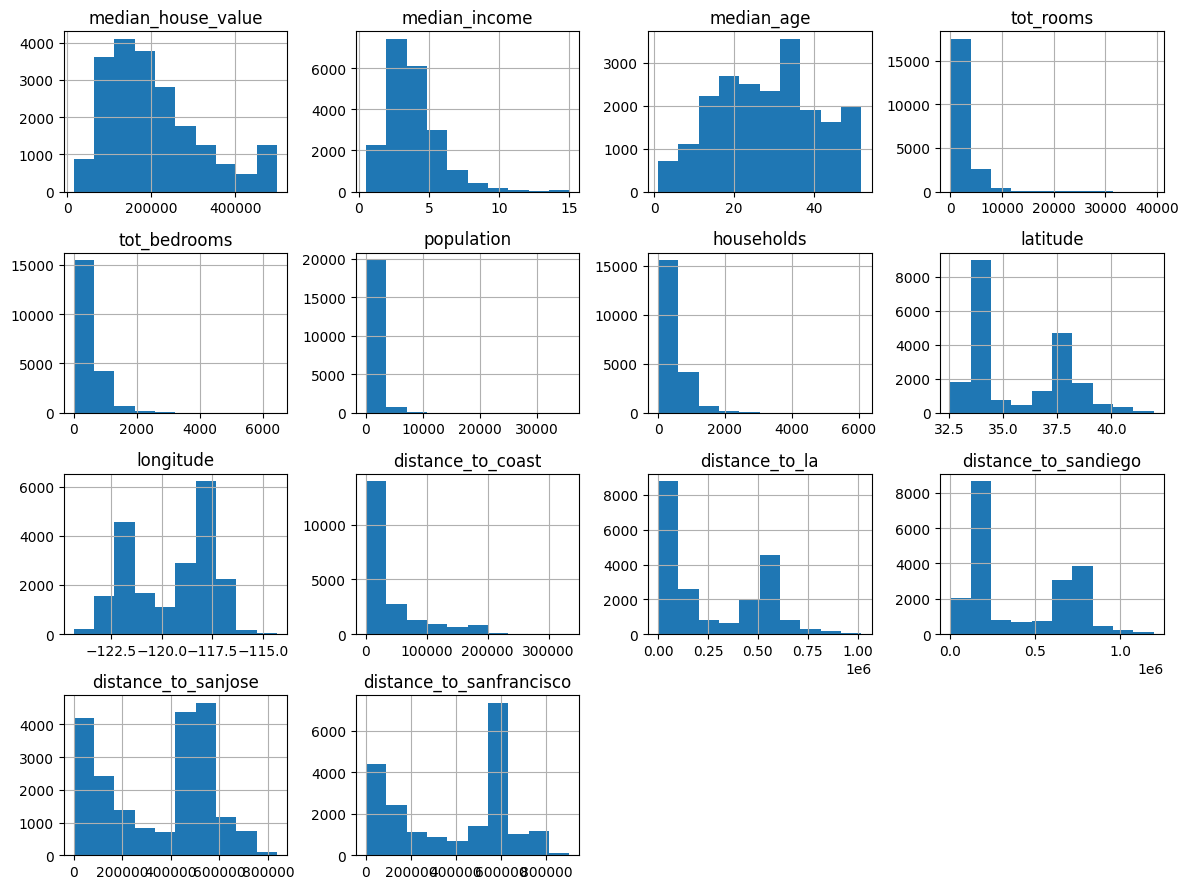

In [23]:
df.hist(figsize=(12, 9))
plt.tight_layout()
plt.show()

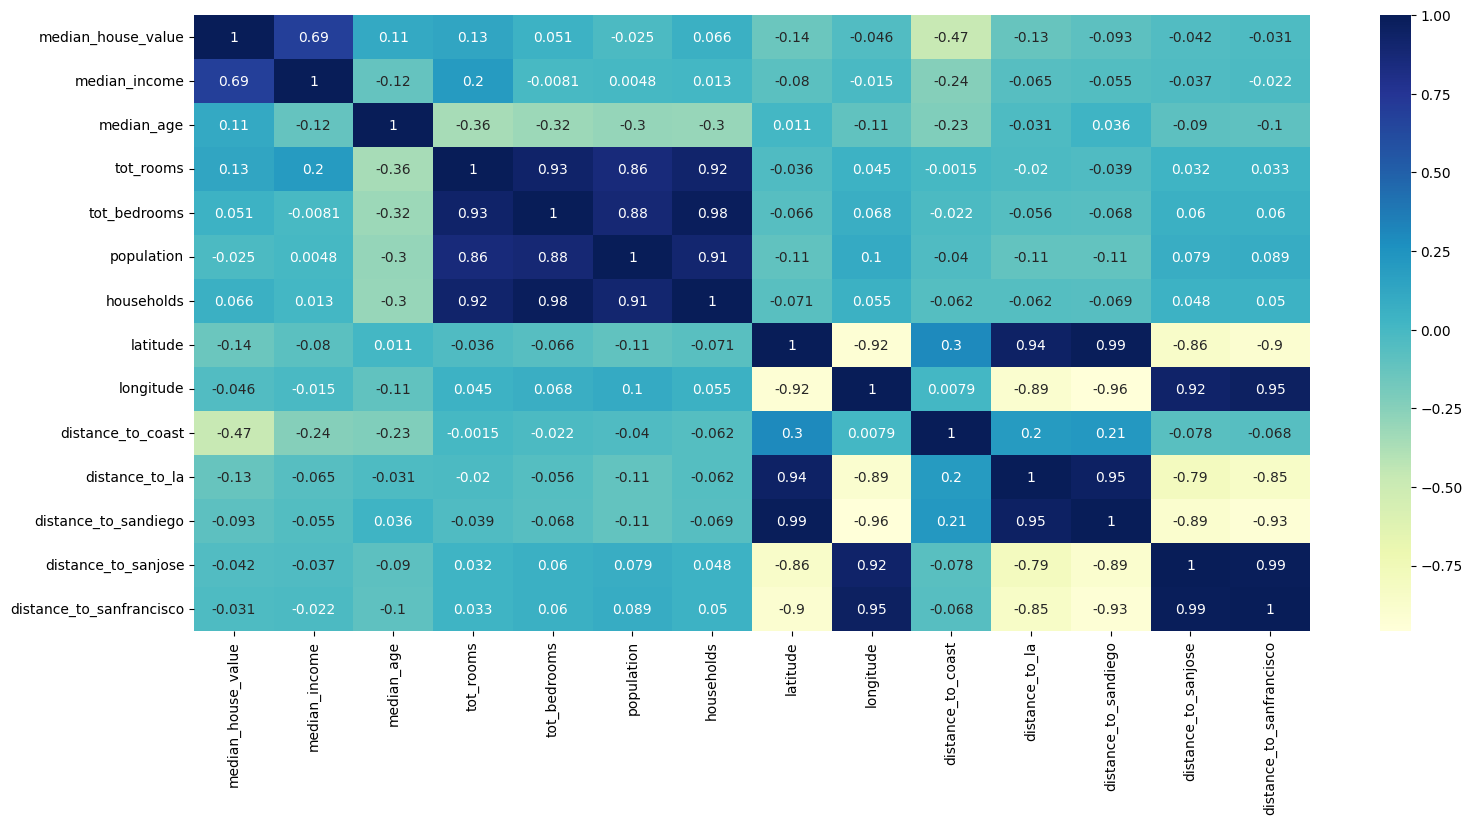

In [24]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

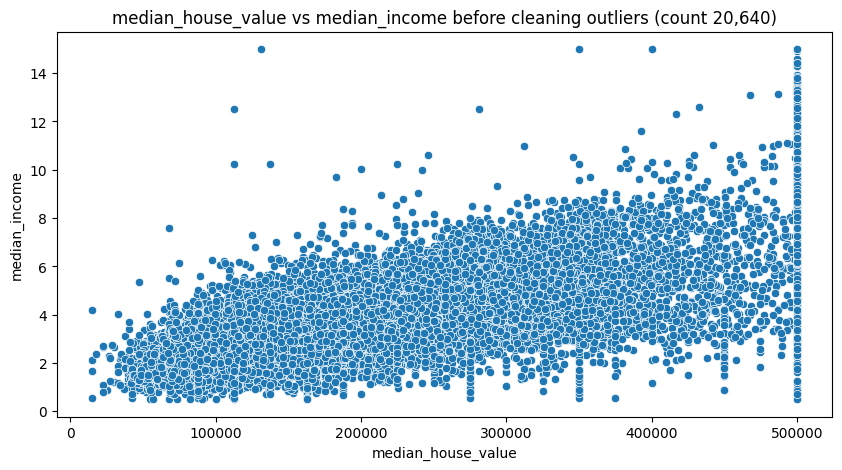

In [28]:
plt.figure(figsize=(10, 5))
x_axis = 'median_house_value'
y_axis = 'median_income'
sns.scatterplot(data=df, x=x_axis, y=y_axis)
plt.title(f'{x_axis} vs {y_axis} before cleaning outliers (count {df.shape[0]:,})')
plt.show()

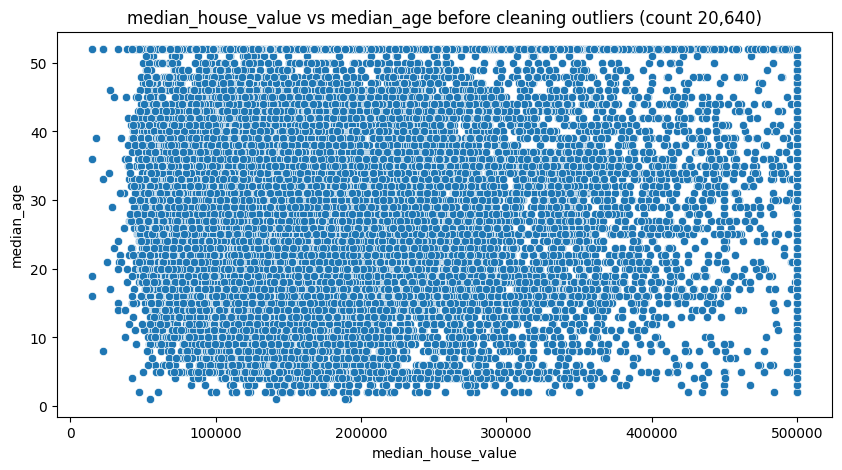

In [29]:
plt.figure(figsize=(10, 5))
x_axis = 'median_house_value'
y_axis = 'median_age'
sns.scatterplot(data=df, x=x_axis, y=y_axis)
plt.title(f'{x_axis} vs {y_axis} before cleaning outliers (count {df.shape[0]:,})')
plt.show()

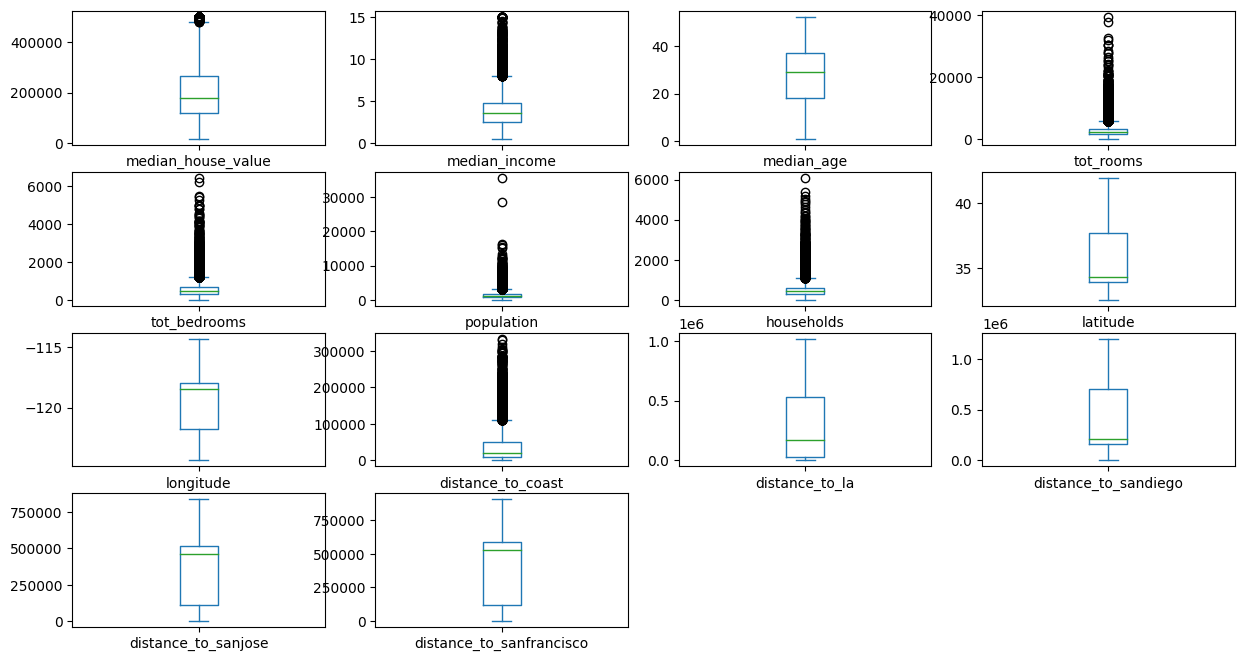

In [32]:
#--Boxplot of all the variables in dataset
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,8))
plt.title('Box-plot of Features')
plt.show()